### Load packages

In [1]:
import pandas as pd

### Load dataset

In [4]:
df = pd.read_csv("../data/Global Superstore.csv", encoding='ISO-8859-1')
df.head(2)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341   IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   

   Customer Name    Segment           City            State  ...  \
0    Rick Hansen   Consumer  New York City         New York  ...   
1  Justin Ritter  Corporate     Wollongong  New South Wales  ...   

        Product ID    Category Sub-Category  \
0  TEC-AC-10003033  Technology  Accessories   
1  FUR-CH-10003950   Furniture       Chairs   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  

[2 rows x 24 columns]

In [5]:
df.shape

(51290, 24)

In [6]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [8]:
# df.isnull().sum()

### Load description of 'Global Superstore' dataset

In [9]:
description = pd.read_csv('../data/Data Dictionary.csv')
description

Attributes                                       Description
0         Order ID                     Unique ID of the transaction 
1       Order Date                Date on which the order was placed
2        Ship Date               Date on which the shipment was made
3        Ship Mode                   The mode of shipment (category)
4      Customer ID                     The unique ID of the customer
5    Customer Name                              Name of the customer
6          Segment  The market segment to which the customer belongs
7             City                      City of the delivery address
8            State                     State of the delivery address
9          Country                   Country of the delivery address
10     Postal Code               Postal code of the delivery address
11          Market      Market segment to which the customer belongs
12          Region               Geographical region of the customer
13      Product ID                          Unique ID of the product
14        Category                           Category of the product
15    Sub-Category                       Sub-category of the product
16    Product Name                               Name of the product
17           Sales              Total sales value of the transaction
18        Quantity                   Quantity of the product ordered
19        Discount        Discount percentage offered on the product
20          Profit                    Profit made on the transaction
21   Shipping Cost          Shipping cost incured on the transaction
22  Order Priority                    Priority assigned to the order

### Check datatype of each column

In [10]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [15]:
df['order_date']=pd.to_datetime(df['Order Date'])
df.dtypes[-4:]

Profit                   float64
Shipping Cost            float64
Order Priority            object
order_date        datetime64[ns]
dtype: object

In [16]:
df.shape

(51290, 25)

In [18]:
df["Order Date"][0]

'31-07-2012'

In [19]:
df["order_date"][0]

Timestamp('2012-07-31 00:00:00')

In [20]:
df["ship_date"]=pd.to_datetime(df["Ship Date"])
df[['Order Date','order_date','Ship Date','ship_date']].head()

Order Date order_date   Ship Date  ship_date
0  31-07-2012 2012-07-31  31-07-2012 2012-07-31
1  05-02-2013 2013-05-02  07-02-2013 2013-07-02
2  17-10-2013 2013-10-17  18-10-2013 2013-10-18
3  28-01-2013 2013-01-28  30-01-2013 2013-01-30
4  05-11-2013 2013-05-11  06-11-2013 2013-06-11

### Extract year from date

In [24]:
df.head(2)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298  CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341   IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   

   Customer Name    Segment           City            State  ... Sub-Category  \
0    Rick Hansen   Consumer  New York City         New York  ...  Accessories   
1  Justin Ritter  Corporate     Wollongong  New South Wales  ...       Chairs   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   

  Discount    Profit Shipping Cost Order Priority  order_date  ship_date  
0      0.0  762.1845        933.57       Critical  2012-07-31 2012-07-31  
1      0.1 -288.7650        923.63       Critical  2013-05-02 2013-07-02  

[2 rows x 26 columns]

In [34]:
df['year']=df.order_date.dt.year
df['month']=df.order_date.dt.month
df['day_name']=df.order_date.dt.day_name()

In [37]:
df[['Product Name','order_date','ship_date','year','month','day_name']].head(2)

Product Name order_date  ship_date  \
0  Plantronics CS510 - Over-the-Head monaural Wir... 2012-07-31 2012-07-31   
1          Novimex Executive Leather Armchair, Black 2013-05-02 2013-07-02   

   year  month  day_name  
0  2012      7   Tuesday  
1  2013      5  Thursday

In [38]:
df.year.unique()

array([2012, 2013, 2011, 2014], dtype=int64)

### Plot data per year

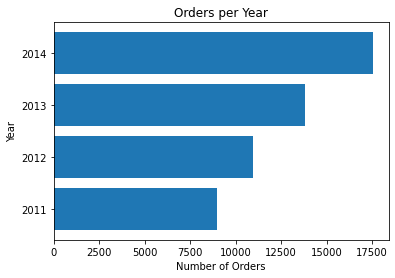

In [51]:
import matplotlib.pyplot as plt
d=df.year.value_counts()
plt.barh(d.index, d)
plt.yticks(d.index)
plt.xlabel("Number of Orders")
plt.ylabel("Year")
plt.title("Orders per Year")
plt.show()

### Return no. of orders of every month in 2014

In [55]:
df[df.year==2014].month.value_counts()
df[df.year==2014].order_date.dt.month.value_counts()

11    1993
12    1831
9     1694
10    1685
6     1606
8     1569
3     1355
5     1303
4     1267
7     1137
1     1075
2     1016
Name: order_date, dtype: int64

In [59]:
df[(df.year==2014)&(df.month==2)].Sales.sum()

244159.30486

In [84]:
import numpy as np
months=df[df.year==2014].month.unique()
newdf=[]
for i in np.sort(months):
    sales = df[(df.year==2014)&(df.month==i)].Sales.sum()
    newdf.append([i, sales])

<AxesSubplot:xlabel='month'>

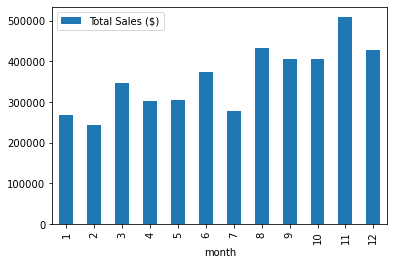

In [85]:
df_sales=pd.DataFrame(newdf,columns=["month","Total Sales ($)"])
df_sales.set_index("month",inplace=True)
df_sales.plot(kind='bar')

In [80]:
df_sales

Total Sales ($)
month                 
10        406659.41500
7         278672.17326
3         347720.96868
8         432731.04194
1         268265.52240
5         304798.83604
11        508954.73156
9         405436.70584
12        427757.39800
2         244159.30486
6         372577.23298
4         302132.54000

In [88]:
df.order_date.dt.week.value_counts()[:4]

<ipython-input-88-616d28462bc0>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.order_date.dt.week.value_counts()[:4]


47    1562
52    1501
46    1472
39    1471
Name: order_date, dtype: int64

In [90]:
df[["Product Name","Order Date"]]

Product Name  Order Date
0      Plantronics CS510 - Over-the-Head monaural Wir...  31-07-2012
1              Novimex Executive Leather Armchair, Black  05-02-2013
2                      Nokia Smart Phone, with Caller ID  17-10-2013
3                         Motorola Smart Phone, Cordless  28-01-2013
4                         Sharp Wireless Fax, High-Speed  05-11-2013
...                                                  ...         ...
51285                      Advantus Thumb Tacks, 12 Pack  19-06-2014
51286  Hoover Replacement Belt for Commercial Guardsm...  20-06-2014
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes  02-12-2013
51288                            Acco Index Tab, Economy  18-02-2012
51289            Eaton Computer Printout Paper, 8.5 x 11  22-05-2012

[51290 rows x 2 columns]

In [99]:
df[df["Product Name"]=="microwave"]

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority, order_date, ship_date, year, month, day_name]
Index: []

[0 rows x 29 columns]

### Search from string

In [108]:
df[df["Product Name"].str.contains("microwave", case=False)].iloc[:,16:20]

Sub-Category                     Product Name     Sales  Quantity
14      Appliances      KitchenAid Microwave, White  3701.520        12
71      Appliances  Hamilton Beach Microwave, Black  2443.480        13
227     Appliances          Breville Microwave, Red  1538.721         6
233     Appliances         Hoover Microwave, Silver  1237.560         4
272     Appliances        Breville Microwave, White  2698.650         9
...            ...                              ...       ...       ...
27067   Appliances       Cuisinart Microwave, Black   111.156         1
28030   Appliances         Hoover Microwave, Silver    92.817         1
30526   Appliances       Cuisinart Microwave, Black   185.260         1
37133   Appliances          Hoover Microwave, White  1840.680         6
46885   Appliances         Cuisinart Microwave, Red   556.920         2

[233 rows x 4 columns]

In [ ]:
### 